The Canny edge detection algorithm is composed of 5 steps:

* Noise reduction;
* Gradient calculation;
* Non-maximum suppression;
* Double threshold;
* Edge Tracking by Hysteresis.

In [15]:
%pylab inline
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.image as mpimg
from scipy import ndimage
import os
import scipy.misc as sm
import skimage
import cv2
from scipy.ndimage.filters import convolve


Populating the interactive namespace from numpy and matplotlib


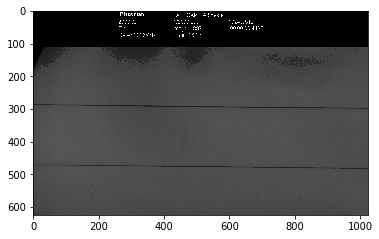

In [5]:
img = cv2.imread('new_data/parachute.tif') 
imgplot = plt.imshow(img)

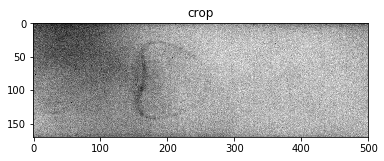

In [6]:
imgTocrop = cv2.imread("new_data/parachute.tif",0)
crop_img = imgTocrop[300:470, 300:800]
plt.imshow(crop_img, cmap=plt.cm.gray)
plt.title('crop')
plt.show()

## Noise reduction

In [1]:

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

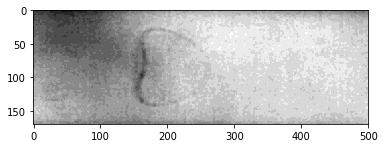

In [13]:
img_filtered = convolve(crop_img,gaussian_kernel(5,sigma=1.2))
plt.imshow(img_filtered, cmap=plt.cm.gray)
plt.show()

### Gradient calculation

In [16]:

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

In [17]:
grad, theta = sobel_filters(img_filtered)

### Non-Maximum Suppression


In [20]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    return Z

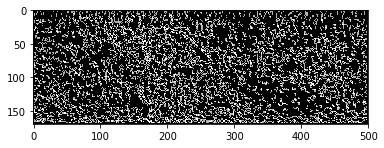

In [24]:
imgs_nms = non_max_suppression(grad,theta)
plt.imshow(imgs_nms, cmap=plt.cm.gray)
plt.show()